In [99]:
import torch
import torch.nn as nn

import math

import numpy as np

import matplotlib.pyplot as plt

In [100]:
def positional_encoding(x, L):
    freq = torch.pi * torch.pow(2, torch.arange(0, L))
    pe = torch.zeros(L*2)
    pe[0::2] = torch.sin(freq * x)
    pe[1::2] = torch.cos(freq * x)
    return pe

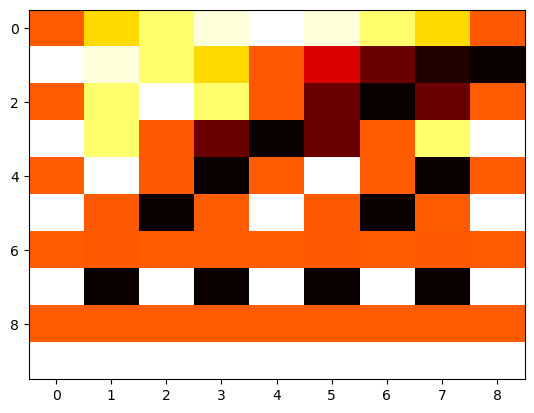

In [101]:
# Example usage
L = 10
size = 9
embedding = torch.stack([positional_encoding(x/(size-1), 5) for x in range(size)])
fig = plt.imshow(embedding.T, aspect='auto', interpolation='none', cmap='hot')

# Studying inverse

In [126]:
x = 3
size = 9
L = 5
emb = positional_encoding(x/(size-1), L)
print(emb)

tensor([ 9.2388e-01,  3.8268e-01,  7.0711e-01, -7.0711e-01, -1.0000e+00,
         1.1925e-08, -2.3850e-08, -1.0000e+00,  4.7700e-08,  1.0000e+00])


In [129]:
arcsin = torch.arcsin(emb[0::2]) / (torch.pi * torch.pow(2, torch.arange(0, L)))
arcsin = torch.cat([((v + torch.arange(20) * pow(2, 1-idx))*(size-1)).flatten() for idx, v in enumerate(arcsin)])

print(arcsin)

arccos = torch.arccos(emb[1::2]) / (torch.pi * torch.pow(2, torch.arange(0, L)))
arccos = torch.cat([((v + torch.arange(20) * pow(2, 1-idx))*(size-1)).flatten() for idx, v in enumerate(arccos)])

decoding = torch.cat([arcsin, arccos])
decoding = decoding[(decoding >= 0) & (decoding <= size)]

decoding

tensor([ 3.0000e+00,  1.9000e+01,  3.5000e+01,  5.1000e+01,  6.7000e+01,
         8.3000e+01,  9.9000e+01,  1.1500e+02,  1.3100e+02,  1.4700e+02,
         1.6300e+02,  1.7900e+02,  1.9500e+02,  2.1100e+02,  2.2700e+02,
         2.4300e+02,  2.5900e+02,  2.7500e+02,  2.9100e+02,  3.0700e+02,
         1.0000e+00,  9.0000e+00,  1.7000e+01,  2.5000e+01,  3.3000e+01,
         4.1000e+01,  4.9000e+01,  5.7000e+01,  6.5000e+01,  7.3000e+01,
         8.1000e+01,  8.9000e+01,  9.7000e+01,  1.0500e+02,  1.1300e+02,
         1.2100e+02,  1.2900e+02,  1.3700e+02,  1.4500e+02,  1.5300e+02,
        -1.0000e+00,  3.0000e+00,  7.0000e+00,  1.1000e+01,  1.5000e+01,
         1.9000e+01,  2.3000e+01,  2.7000e+01,  3.1000e+01,  3.5000e+01,
         3.9000e+01,  4.3000e+01,  4.7000e+01,  5.1000e+01,  5.5000e+01,
         5.9000e+01,  6.3000e+01,  6.7000e+01,  7.1000e+01,  7.5000e+01,
        -7.5916e-09,  2.0000e+00,  4.0000e+00,  6.0000e+00,  8.0000e+00,
         1.0000e+01,  1.2000e+01,  1.4000e+01,  1.6

tensor([3.0000e+00, 1.0000e+00, 9.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00,
        4.0000e+00, 6.0000e+00, 8.0000e+00, 7.5916e-09, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 4.0000e+00, 5.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00,
        9.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 5.0000e+00, 9.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 7.0000e+00, 9.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00, 6.0000e+00,
        7.0000e+00, 8.0000e+00, 9.0000e+00])

In [130]:
arcsin = torch.arcsin(emb[0::2]) / (torch.pi * torch.pow(2, torch.arange(0, L)))
arcsin

tensor([ 3.7500e-01,  1.2500e-01, -1.2500e-01, -9.4895e-10,  9.4895e-10])

In [132]:
torch.arange(20) * pow(2, 1-0)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38])